# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

### Djihadi Ahamdy, Malik Sedira, Wissem Ferchichi

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

1) A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

2) Train a decision tree for each of the previous configurations on the full dataset

First we prepare the data set to build the decision tree and make all the import we need

In [1]:
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from matplotlib import pyplot as plt # for a good visualization of the tree
import csv
import pandas as pd
import random
import numpy as np
from utils import load_from_csv


train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

<h4> In order to have 6 different configurations, we decided to change some parameters of "decision tree Classifier" like the max depth of the tree, the minimum number of samples required to be at a leaf node,the strategy used to choose the split at each node, the function to measure the quality of a split and the number of features to consider when looking for the best split.
<br>

Configuration A: without specification </h4>


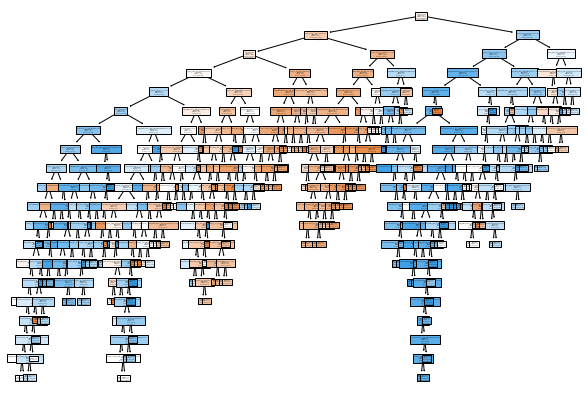

In [2]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)



<h4> Configuration B: </h4>

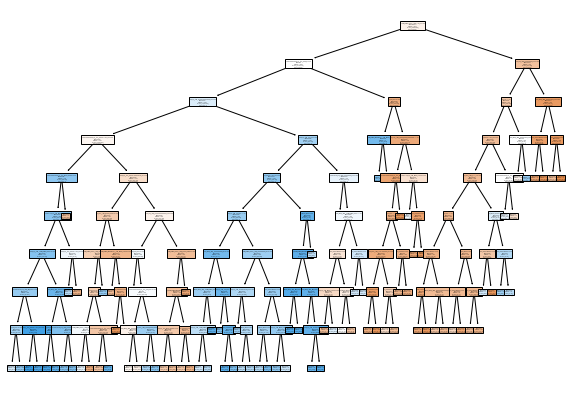

In [3]:
profendeur = 9
split = 'best'
criter = 'gini'
min_feuille = 7
max_features = 'auto'

clf = tree.DecisionTreeClassifier(criterion = criter, max_depth = profendeur, splitter = split , min_samples_leaf = min_feuille,max_features=max_features)
clf_a = clf.fit(train_examples, train_labels)
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_a, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


<h4> Configuration C: </h4>

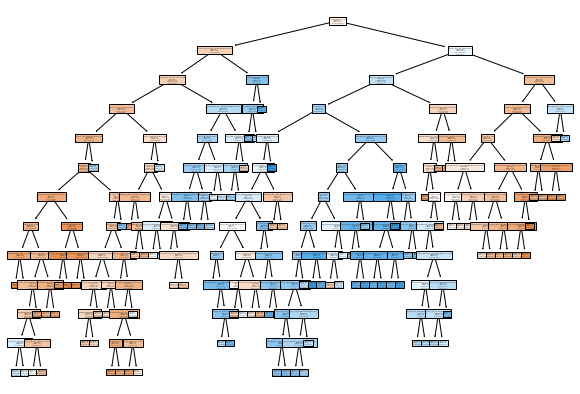

In [4]:
profendeur = 12
split = 'random'
criter = 'gini'
min_feuille = 12
max_features = 'sqrt'

clf = tree.DecisionTreeClassifier(criterion = criter, max_depth = profendeur, splitter = split , min_samples_leaf = min_feuille,max_features=max_features)
clf_b = clf.fit(train_examples, train_labels)
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_b, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


<h4> Configuration D: </h4>

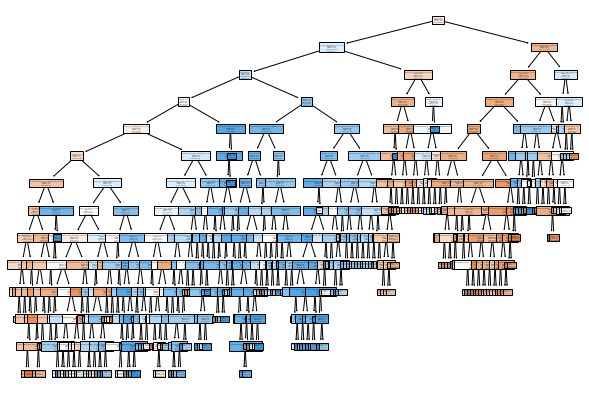

In [5]:
profendeur = 13
split = 'best'
criter = 'entropy'
min_feuille = 1
max_features = 'sqrt'

clf = tree.DecisionTreeClassifier(criterion = criter, max_depth = profendeur, splitter = split , min_samples_leaf = min_feuille,max_features=max_features)
clf_c = clf.fit(train_examples, train_labels)
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_c, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


<h4> Configuration E: </h4>

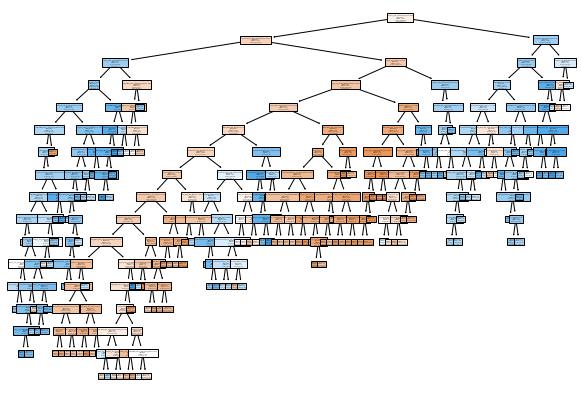

In [6]:
profendeur = None
split = 'random'
criter = 'gini'
min_feuille = 5
max_features = 'sqrt'

clf = tree.DecisionTreeClassifier(criterion = criter, max_depth = profendeur, splitter = split , min_samples_leaf = min_feuille,max_features=max_features)
clf_d = clf.fit(train_examples, train_labels)
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_d, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


<h4> Configuration F: </h4>

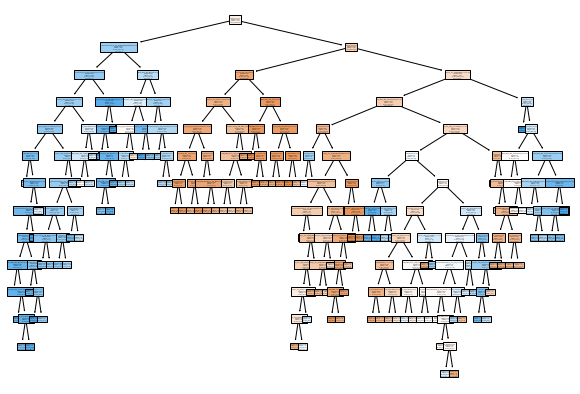

In [7]:
profendeur = 20
split = 'best'
criter = 'entropy'
min_feuille = 10
max_features = 'sqrt'

clf = tree.DecisionTreeClassifier(criterion = criter, max_depth = profendeur, splitter = split , min_samples_leaf = min_feuille,max_features=max_features)
clf_e = clf.fit(train_examples, train_labels)
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_e, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


3) Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

<h4> </h4>

In [8]:
taille = len(train_examples)

def taill_en_poucentage(x):
    return x*taille/100
def moyen(L):
    return sum(L)/len(L)

tail_prct = int(taill_en_poucentage(80))

#DIFFERENT SPECIFICATIION TO BUILD DIFFERENT TREE DECISION
profondeur=[5,2,5,3,6,8]
min_feuille =[1,10,5,2,4,6]

kf = model_selection.KFold(n_splits=5) # Specify the split in K
kf.get_n_splits(train_examples)

score_tree1=[]
score_tree2=[]


# CROSS VALIDATION FOR FIRST TYPOLOGI

for train_index, test_index in kf.split(train_examples):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_examples[train_index], train_examples[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    clf = tree.DecisionTreeClassifier(max_depth=profondeur[0],min_samples_leaf = min_feuille[0])
    clf = clf.fit(X_train, y_train)
    #print("SCORE : ",clf.score(X_train,y_train)*100 , "Profondeur :",profondeur[index],"Feuille Min :",min_feuille[index])
    #print("----------------- \n")
    
    #ADD THE SCORE TO AN LIST
    score_tree1.append(clf.score(X_train,y_train)*100)

    
    
# CROSS VALIDATION FOR THE SECOND TYPOLOGI

for train_index, test_index in kf.split(train_examples):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_examples[train_index], train_examples[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    clf = tree.DecisionTreeClassifier(max_depth=profondeur[1],min_samples_leaf = min_feuille[1])
    clf = clf.fit(X_train, y_train)
    #print("SCORE : ",clf.score(X_train,y_train)*100 , "Profondeur :",profondeur[index],"Feuille Min :",min_feuille[index])
    #print("----------------- \n")
    
    #ADD THE SCORE TO AN LIST
    score_tree2.append(clf.score(X_train,y_train)*100)
    
print("SCORE TREE N°1 :",moyen(score_tree1))
print("SCORE TREE N°2 :",moyen(score_tree2))


SCORE TREE N°1 : 67.82190256523161
SCORE TREE N°2 : 63.607068477391955


4) Propose an experimental study that shows the transition phase from underfitting to overfitting 

PREDICTION : two_year_recid
SCORE FOR THE PREDICTION : 63.791469194312796


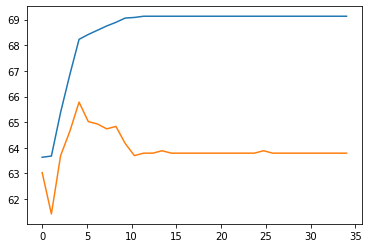

In [9]:
taille = 0

#print("TRUC GENERAL")

#CONFIGURATION
profendeur = 5
split = 'best'
feuille = 5

print("PREDICTION :",prediction)
taille = len(train_examples)

def taill_en_poucentage(x):
    return x*taille/100
def difference (liste1,liste2):
    somme = 0
    for i in range(len(liste1)):
        if (liste1[i] != liste2[i]):
            somme = somme + 1
    return somme
tail_prct = int(taill_en_poucentage(80))




y1=[]
y2=[]

for i in range (1,35) :
    profendeur = i
    train = train_examples[:tail_prct]
    labels = train_labels[:tail_prct]
    
    test = train_examples[tail_prct:]
    waitedResult = train_labels[tail_prct:]
    
    clf = tree.DecisionTreeClassifier(max_depth = profendeur, splitter = split , min_samples_leaf = feuille)
    clf = clf.fit(train, labels)
    y1.append(clf.score(test,waitedResult)*100)
    y2.append(clf.score(train,labels)*100)

x1=np.linspace(0,34,34)
plt.plot(x1,y2)
plt.plot(x1,y1)
    
    


train = train_examples[:tail_prct]
labels = train_labels[:tail_prct]
test = train_examples[tail_prct:]
waitedResult = train_labels[tail_prct:]

clf = tree.DecisionTreeClassifier(max_depth = profendeur, splitter = split , min_samples_leaf = feuille)
clf = clf.fit(train, labels)
print ("SCORE FOR THE PREDICTION :",clf.score(test,waitedResult)*100)
predicted = clf.predict(test)
#print ("",(difference(waitedResult,predicted)/len(test))*100)



<h4>We can see above two lines, the orange one represents the predection score of the decision tree after the training and the blue one represents the predection score of the decision tree during the training. <br><br>
    With a depth going from 0 to 3, we can see an underfitting because the model is not efficient enough to predict an acceptable value. With depth equal 4, we have a good fitting and the prediction score is the highest. With a depth equal to 5 or higher, we can see an overfitting becaure the prediction score of the decision tree is decreasing.
    </h4>

5) Construct the confusion matrix on a particular good configuration (after explaining your choice) <br>

    - To construct our confusion matrix we decided to compare two parameters : the predicted value and the expected value. This confusion will display the number of correspondance between them.

In [14]:
confusionMatrix = metrics.confusion_matrix(predicted, waitedResult)
print("Confusion Matrix : \n",confusionMatrix)

Confusion Matrix : 
 [[406 229]
 [153 267]]


6) Provide an evaluation of the fairness of the model based on the False Positive Rate <br>

    - The confusion Matrix can be read as the number of :
    -True positif  at confusionMatrix [0][0]
    -True negatif  at confusionMatrix [0][1]
    -False positif at confusionMatrix [1][0]
    -False negatif at confusionMatrix [1][1]

In [11]:
print("True negatif rate" , (confusionMatrix[0][1] / (confusionMatrix[0][0]+confusionMatrix[0][1]))*100)
print("False positif rate" , (confusionMatrix[1][0] / (confusionMatrix[1][0]+confusionMatrix[1][1]))*100)

True negatif rate 36.06299212598425
False positif rate 36.42857142857142
